In [1]:
import pandas as pd
import numpy as np

import string
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [5]:
test.head(2)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [8]:
print('Train')
for col in ['location', 'keyword']:
    print(col, train[col].nunique())
print('###')
print('Test')
for col in ['location', 'keyword']:
    print(col, test[col].nunique())

Train
location 3341
keyword 221
###
Test
location 1602
keyword 221


# EDA

In [9]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


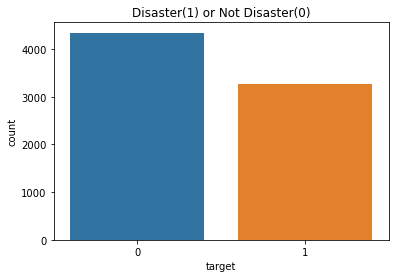

In [10]:
sns.countplot(x="target", data=train)
plt
plt.title("Disaster(1) or Not Disaster(0)")
plt.show()

<AxesSubplot:>

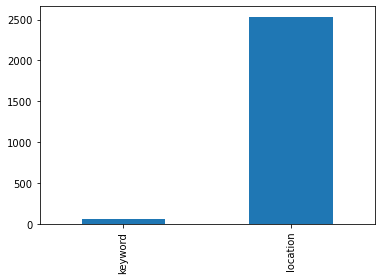

In [11]:
# Cheking for null values of the train dataframe

null = train.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

<AxesSubplot:>

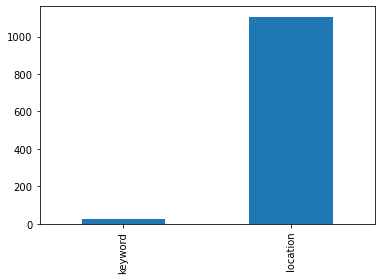

In [12]:
# Cheking for null values of the test dataframe

null = test.isnull().sum()
null = null[null > 0]
null.sort_values(inplace=True)
null.plot.bar()

In [13]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [14]:
test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

In [15]:
# United States and USA are the same
# California and California, USA are also the same
# New York and New York, NY also

train['location'].value_counts().head(20)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Australia           18
Chicago, IL         18
California          17
Everywhere          15
New York, NY        15
California, USA     15
Florida             14
Name: location, dtype: int64

In [16]:
train['keyword'].value_counts().head(20)

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
sunk           39
hellfire       39
weapon         39
weapons        39
famine         39
Name: keyword, dtype: int64

In [17]:
#check if there is emojis

def removing_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [18]:
train['text'] = train['text'].apply(removing_emoji)
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [19]:
# We need to replace symbols with nothing in the text feature


In [20]:
from tqdm import tqdm

text_list = list(train['text'])

clear_text_list = [] 

for i in tqdm(range(len(text_list))):
    clear_text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',text_list[i])
    #re.sub 
    clear_text_list.append(clear_text.lower())
    #lower
    
train['clear_text'] = clear_text_list


100%|██████████| 7613/7613 [00:00<00:00, 345961.80it/s]


In [21]:
train.head(10)

,id,keyword,location,text,target,clear_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy 20 closed in ...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodin...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,im on top of the hill and i can see a fire in ...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,theres an emergency evacuation happening now i...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,im afraid that the tornado is coming to our area


In [22]:
#text_list = list(test['text'])
#
#clear_text_list = [] 
#
#for i in tqdm(range(len(text_list))):
#    clear_text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','',text_list[i])
#    #re.sub 
#    clear_text_list.append(clear_text.lower())
#    #lower
#    
#test['clear_text'] = clear_text_list

In [23]:
#test.head(10)

In [24]:
pip install pyspellchecker

Note: you may need to restart the kernel to use updated packages.


In [25]:
# spellcheking
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [26]:
train['clear_text_corrected'] = train['clear_text'].apply(correct_spellings)

In [27]:
train.head(10)

,id,keyword,location,text,target,clear_text,clear_text_corrected
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,forest fire near la range ask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,just got sent this photo from ruby alaska as s...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy 20 closed in ...,rockyfire update california why 20 closed in b...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodin...,flood disaster heavy rain causes flash floodin...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,im on top of the hill and i can see a fire in ...,im on top of the hill and i can see a fire in ...
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,theres an emergency evacuation happening now i...,theres an emergency evacuation happening now i...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,im afraid that the tornado is coming to our area,im afraid that the tornado is coming to our area


In [28]:
new_train = pd.DataFrame(train[['id', 'keyword', 'location', 'clear_text_corrected', 'target']])

In [29]:
new_train.head()

,id,keyword,location,clear_text_corrected,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la range ask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


In [30]:
#new_test = pd.DataFrame(test[['id', 'keyword', 'location', 'clear_text']])

In [31]:
#new_test.head()

In [32]:
new_train['keyword'] = new_train['keyword'].fillna('none')
new_train['location'] = new_train['location'].fillna('unknown')

In [33]:
new_train.isnull().sum()

id                      0
keyword                 0
location                0
clear_text_corrected    0
target                  0
dtype: int64

In [34]:
#new_test['keyword'] = new_test['keyword'].fillna('none')
#new_test['location'] = new_test['location'].fillna('unknown')

In [35]:
#new_test.isnull().sum()

In [36]:
from nltk.corpus import stopwords

In [37]:
stop=set(stopwords.words('english'))

In [38]:
def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
                words.append(j.strip())
    return words
corpus_real = get_corpus(new_train[new_train.target == 1].clear_text_corrected)
corpus_fake = get_corpus(new_train[new_train.target == 0].clear_text_corrected)

In [39]:
from collections import Counter
counter_real_stopword = Counter(corpus_real)
counter_fake_stopword = Counter(corpus_fake)

most_common_real_stopword = dict(counter_real_stopword)
most_common_fake_stopword = dict(counter_fake_stopword)

most_common_real_stopword = sorted(most_common_real_stopword.items(), key=lambda x:x[1], reverse=True)[:10]
most_common_fake_stopword = sorted(most_common_fake_stopword.items(), key=lambda x:x[1], reverse=True)[:10]

In [103]:
def count_mention(text):
    words = text.split()
    
    mentions = [word for word in words if word.startswith('@')]
    return len(mentions)

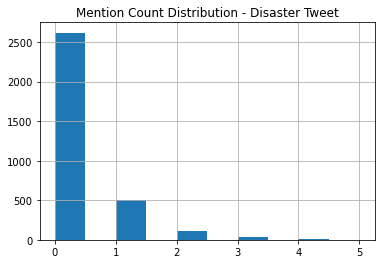

In [105]:
train[train['target'] == 1 ]['text'].apply(count_mention).hist()
plt.title('Mention Count Distribution - Disaster Tweet')
plt.show()

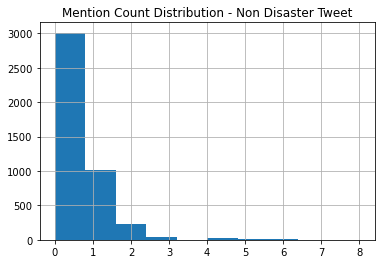

In [106]:
train[train['target'] == 0 ]['text'].apply(count_mention).hist()
plt.title('Mention Count Distribution - Non Disaster Tweet')
plt.show()

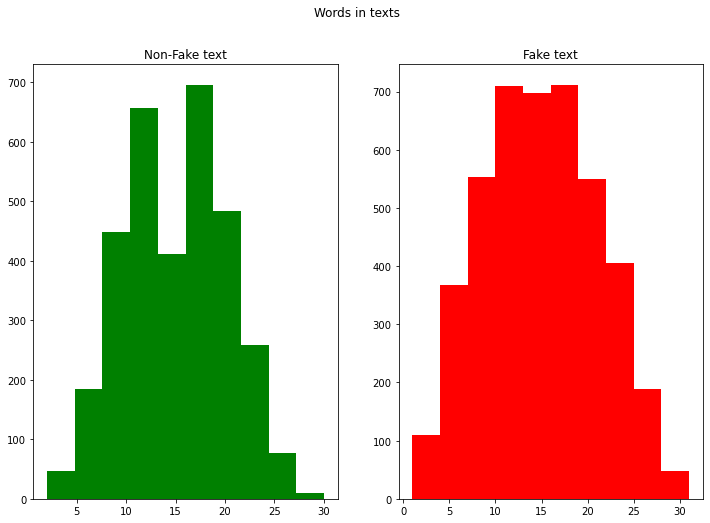

In [107]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=new_train[new_train.target == 1]['clear_text_corrected'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title('Non-Fake text')

text_len=new_train[new_train.target == 0]['clear_text_corrected'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Fake text')

fig.suptitle('Words in texts')
plt.show()

<BarContainer object of 10 artists>

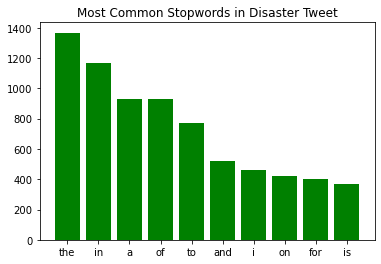

In [40]:
x, y = zip(*most_common_real_stopword)
plt.title('Most Common Stopwords in Disaster Tweet')
plt.bar(x, y, color='green')

<BarContainer object of 10 artists>

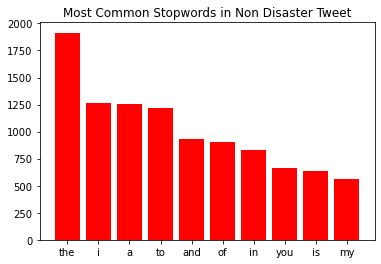

In [41]:
x, y = zip(*most_common_fake_stopword)
plt.title('Most Common Stopwords in Non Disaster Tweet')
plt.bar(x, y, color='red')

In [42]:
def common_words(target):
    word_list = []
    word_ammount = []

    for word, ammount in target[:50]:
        if( word not in stop and word not in punctuation_list):
            word_list.append(word)
            word_ammount.append(ammount)
            
    sns.barplot(x=word_ammount, y=word_list)

In [43]:
punctuation_list = string.punctuation

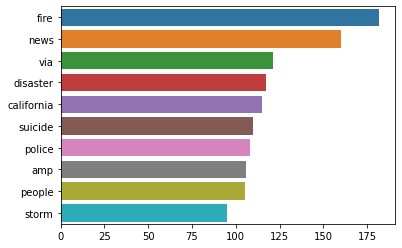

In [44]:
common_words(counter_real_stopword.most_common())

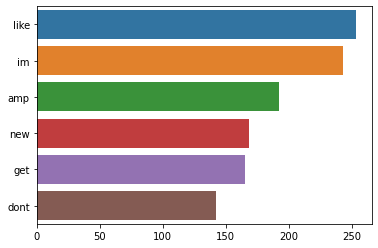

In [45]:
common_words(counter_fake_stopword.most_common())

In [46]:
new_train.head()

,id,keyword,location,clear_text_corrected,target
0,1,none,unknown,our deeds are the reason of this earthquake ma...,1
1,4,none,unknown,forest fire near la range ask canada,1
2,5,none,unknown,all residents asked to shelter in place are be...,1
3,6,none,unknown,13000 people receive wildfires evacuation orde...,1
4,7,none,unknown,just got sent this photo from ruby alaska as s...,1


In [110]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


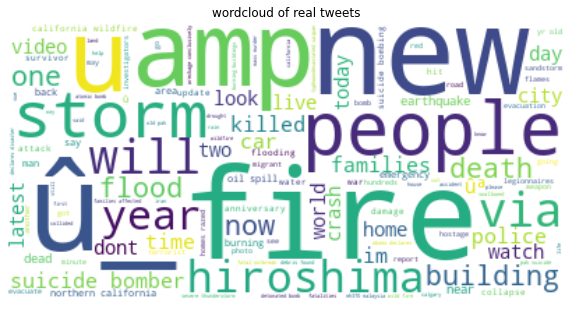

In [140]:
#wordcloud
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

data_real = new_train[new_train['target']==1]

text = " ".join(i for i in data_real.clear_text_corrected)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('wordcloud of real tweets')
plt.axis("off")
plt.show()

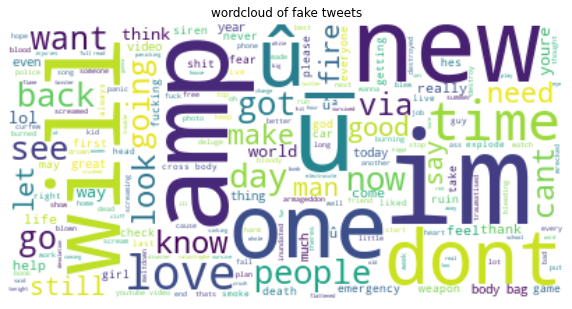

In [141]:
data_fake = new_train[new_train['target']==0]

text = " ".join(i for i in data_fake.clear_text_corrected)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('wordcloud of fake tweets')
plt.axis("off")
plt.show()

In [47]:
# predictions
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

seed = 42

In [48]:
X = new_train['keyword'] + ' ' + new_train['location'] + ' ' +  new_train['clear_text_corrected']
y = new_train['target']

In [49]:
X.head()

0    none unknown our deeds are the reason of this ...
1    none unknown forest fire near la range ask canada
2    none unknown all residents asked to shelter in...
3    none unknown 13000 people receive wildfires ev...
4    none unknown just got sent this photo from rub...
dtype: object

In [50]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [52]:
# try 1
# TfidfVectorizer + MultinomialNB

In [53]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
X_train_1 = tfidf_vectorizer.fit_transform(X_train)
X_test_1 = tfidf_vectorizer.transform(X_test)

In [54]:
clf = MultinomialNB()
parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}
#clf.fit(X_train_1.toarray(), y_train)

#accuracy = clf.score(X_test_1.toarray(), y_test)
#print("The accuracy of the classifier try_1 on test set is", accuracy)

clf_NB = GridSearchCV(clf, parameters, cv = 5, n_jobs=-1).fit(X_train_1.toarray(), y_train)

In [55]:
predictions = clf_NB.predict(X_test_1.toarray())

In [56]:
report = classification_report(y_test, predictions, digits=5) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0    0.78749   0.88847   0.83494      1318
           1    0.81556   0.67288   0.73738       966

    accuracy                        0.79729      2284
   macro avg    0.80152   0.78067   0.78616      2284
weighted avg    0.79936   0.79729   0.79368      2284



In [57]:
# try 2
# TfidfVectorizer + GaussianNB

In [58]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
X_train_2 = tfidf_vectorizer.fit_transform(X_train)
X_test_2 = tfidf_vectorizer.transform(X_test)

In [59]:
clf = GaussianNB()
parameters = {'var_smoothing': [1e-10, 1e-9, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]}

#clf.fit(X_train_2.toarray(), y_train)

#accuracy = clf.score(X_test_2.toarray(), y_test)
#print("The accuracy of the classifier try_2 on test set is", accuracy)

clf_NB = GridSearchCV(clf, parameters, cv = 5, n_jobs=-1).fit(X_train_2.toarray(), y_train)

In [60]:
predictions = clf_NB.predict(X_test_2.toarray())

In [61]:
report = classification_report(y_test, predictions, digits=5) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0    0.82828   0.74659   0.78532      1318
           1    0.69526   0.78882   0.73909       966

    accuracy                        0.76445      2284
   macro avg    0.76177   0.76770   0.76220      2284
weighted avg    0.77202   0.76445   0.76576      2284



In [62]:
# try 3
# TfidfVectorizer + LogisticRegression

In [63]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
X_train_3 = tfidf_vectorizer.fit_transform(X_train)
X_test_3 = tfidf_vectorizer.transform(X_test)

In [64]:
clf = LogisticRegression(random_state = seed, max_iter = 1000)
parameters = {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

#clf.fit(X_train_3.toarray(), y_train)

#accuracy = clf.score(X_test_3.toarray(), y_test)
#print("The accuracy of the classifier try_2 on test set is", accuracy)


clf_lr = GridSearchCV(clf, parameters, cv = 5, n_jobs=-1).fit(X_train_3.toarray(), y_train)

In [65]:
predictions = clf_lr.predict(X_test_3.toarray())

In [66]:
report = classification_report(y_test, predictions, digits=5) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0    0.78904   0.86267   0.82421      1318
           1    0.78529   0.68530   0.73190       966

    accuracy                        0.78765      2284
   macro avg    0.78716   0.77399   0.77805      2284
weighted avg    0.78745   0.78765   0.78517      2284



In [67]:
# try 4
# TfidfVectorizer + XGBClassifier

In [68]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
X_train_4 = tfidf_vectorizer.fit_transform(X_train)
X_test_4 = tfidf_vectorizer.transform(X_test)

In [69]:
clf = XGBClassifier(random_state = seed)
parameters = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'n_estimators': [5,8,10,12,20,25],
             'max_depth': [3,5,8,10,12], 'min_child_weight': [1, 2], 'gamma': [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5], 
             'colsample_bytree': [0.8], 'scale_pos_weight': [1]}

#clf.fit(X_train_4.toarray(), y_train)

#accuracy = clf.score(X_test_4.toarray(), y_test)
#print("The accuracy of the classifier try_2 on test set is", accuracy)

clf_xg = GridSearchCV(clf, parameters, cv = 5, n_jobs=-1).fit(X_train_4, y_train)

In [70]:
predictions = clf_xg.predict(X_test_4.toarray())

In [71]:
report = classification_report(y_test, predictions, digits=5) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000      1318
           1    0.42294   1.00000   0.59446       966

    accuracy                        0.42294      2284
   macro avg    0.21147   0.50000   0.29723      2284
weighted avg    0.17888   0.42294   0.25142      2284



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# try 5
# TfidfVectorizer + SVM

In [73]:
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
X_train_5 = tfidf_vectorizer.fit_transform(X_train)
X_test_5 = tfidf_vectorizer.transform(X_test)

In [74]:
svc = SVC(random_state = seed, probability = True, verbose = True)
parameters = {'C':[1,2,3,4,5,8,9,10], 'kernel': ['poly', 'rbf'], 'cache_size': [1000]}

#clf.fit(X_train_5.toarray(), y_train)

#accuracy = clf.score(X_test_5.toarray(), y_test)
#print("The accuracy of the classifier try_2 on test set is", accuracy)

clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train_5, y_train.values.ravel())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [75]:
predictions = clf_svc.predict(X_test_5.toarray())

In [76]:
report = classification_report(y_test, predictions, digits=5) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0    0.79870   0.83687   0.81734      1318
           1    0.76190   0.71222   0.73622       966

    accuracy                        0.78415      2284
   macro avg    0.78030   0.77454   0.77678      2284
weighted avg    0.78314   0.78415   0.78303      2284



In [77]:
# try 6
# countvectorize + MultinomialNB

In [78]:
cv = CountVectorizer(stop_words = 'english')
X_train_6 = cv.fit_transform(X_train)
X_test_6 = cv.transform(X_test)

In [79]:
clf = MultinomialNB()
parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

#clf.fit(X_train_6.toarray(), y_train)

#accuracy = clf.score(X_test_6.toarray(), y_test)
#print("The accuracy of the classifier try_1 on test set is", accuracy)

clf_NB = GridSearchCV(clf, parameters, cv = 5, n_jobs=-1).fit(X_train_6.toarray(), y_train)

In [80]:
predictions = clf_NB.predict(X_test_6.toarray())

In [81]:
report = classification_report(y_test, predictions, digits=5) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0    0.78446   0.85053   0.81616      1318
           1    0.76959   0.68116   0.72268       966

    accuracy                        0.77890      2284
   macro avg    0.77703   0.76585   0.76942      2284
weighted avg    0.77817   0.77890   0.77663      2284



In [82]:
# try 7
# countvectorize + Random Forest

In [83]:
cv = CountVectorizer(stop_words = 'english')
X_train_7 = cv.fit_transform(X_train)
X_test_7 = cv.transform(X_test)

In [84]:
clf = RandomForestClassifier(random_state = seed)
parameters = {'n_estimators': [5,8,10,12,20,25], 'max_depth': [3,5,8,10,12], 'min_samples_split': [5, 10, 15]}

#clf.fit(X_train_7.toarray(), y_train)

#accuracy = clf.score(X_test_7.toarray(), y_test)
#print("The accuracy of the classifier try_2 on test set is", accuracy)

clf_random_f = GridSearchCV(clf, parameters, cv = 5, n_jobs=-1).fit(X_train_7, y_train.values.ravel())

In [85]:
predictions = clf_random_f.predict(X_test_7.toarray())

In [86]:
report = classification_report(y_test, predictions, digits=5) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0    0.63760   0.95979   0.76620      1318
           1    0.82333   0.25569   0.39021       966

    accuracy                        0.66200      2284
   macro avg    0.73047   0.60774   0.57820      2284
weighted avg    0.71615   0.66200   0.60718      2284



In [87]:
# try 8
# countvectorize + SVM

In [88]:
cv = CountVectorizer(stop_words = 'english')
X_train_8 = cv.fit_transform(X_train)
X_test_8 = cv.transform(X_test)

In [89]:
svc = SVC(random_state = seed, probability = True, verbose = True)
parameters = {'C':[1,2,3,4,5,8,9,10], 'kernel': ['poly', 'rbf'], 'cache_size': [1000]}


#clf.fit(X_train_8.toarray(), y_train)

#accuracy = clf.score(X_test_8.toarray(), y_test)
#print("The accuracy of the classifier try_2 on test set is", accuracy)

clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train_8, y_train.values.ravel())

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [90]:
predictions = clf_svc.predict(X_test_8.toarray())

In [91]:
report = classification_report(y_test, predictions, digits=5) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0    0.77955   0.89074   0.83144      1318
           1    0.81491   0.65631   0.72706       966

    accuracy                        0.79159      2284
   macro avg    0.79723   0.77353   0.77925      2284
weighted avg    0.79450   0.79159   0.78730      2284



In [92]:
# try 9
# countvectorize + LogisticRegression

In [93]:
cv = CountVectorizer(stop_words = 'english')
X_train_9 = cv.fit_transform(X_train)
X_test_9 = cv.transform(X_test)

In [94]:
clf = LogisticRegression(random_state = seed, max_iter = 1000)
parameters = {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

#clf.fit(X_train_3.toarray(), y_train)

#accuracy = clf.score(X_test_3.toarray(), y_test)
#print("The accuracy of the classifier try_2 on test set is", accuracy)


clf_lr = GridSearchCV(clf, parameters, cv = 5, n_jobs=-1).fit(X_train_9.toarray(), y_train)

In [95]:
predictions = clf_lr.predict(X_test_9.toarray())

In [96]:
report = classification_report(y_test, predictions, digits=5) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0    0.78718   0.87557   0.82902      1318
           1    0.79951   0.67702   0.73318       966

    accuracy                        0.79159      2284
   macro avg    0.79334   0.77629   0.78110      2284
weighted avg    0.79239   0.79159   0.78849      2284



In [97]:
# try 10
# countvectorize + XGBClassifier

In [98]:
cv = CountVectorizer(stop_words = 'english')
X_train_10 = cv.fit_transform(X_train)
X_test_10 = cv.transform(X_test)

In [99]:
clf = XGBClassifier(random_state = seed)
parameters = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'n_estimators': [5,8,10,12,20,25],
             'max_depth': [3,5,8,10,12], 'min_child_weight': [1, 2], 'gamma': [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.5], 
             'colsample_bytree': [0.8], 'scale_pos_weight': [1]}

#clf.fit(X_train_4.toarray(), y_train)

#accuracy = clf.score(X_test_4.toarray(), y_test)
#print("The accuracy of the classifier try_2 on test set is", accuracy)

clf_xg = GridSearchCV(clf, parameters, cv = 5, n_jobs=-1).fit(X_train_10, y_train)

In [100]:
predictions = clf_xg.predict(X_test_10.toarray())

In [101]:
report = classification_report(y_test, predictions, digits=5) # precision and recall and accuracy
print(report)

              precision    recall  f1-score   support

           0    0.00000   0.00000   0.00000      1318
           1    0.42294   1.00000   0.59446       966

    accuracy                        0.42294      2284
   macro avg    0.21147   0.50000   0.29723      2284
weighted avg    0.17888   0.42294   0.25142      2284



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
# best so far - Try 1